In [1]:
import pandas as p
data = p.read_csv('N:\STUDY\SEM_8\Capstone\Fusion-Based Ensemble Learning Framework for Enhanced Diabetes Classification\Codes\Local HealthCare.csv')

In [2]:
data.head(5)

,No. of Pregnancy,Age,BMI,BP(Systolic),BP(Diastolic),Genetic,Insulin,Skin Thickness(mm),Glucose Consumption,Outcome
0,3,50,22.263762,140,90,0,0,317.50,14.6,1
1,1,40,24.111159,110,80,2,0,317.50,6.1,0
2,0,21,17.183204,120,80,0,0,259.08,9.7,1
3,2,30,21.244332,130,85,0,0,322.58,17.8,1
4,2,35,22.819490,110,75,0,0,335.28,16.7,1


In [3]:
print(data.isnull().sum())

No. of Pregnancy       0
Age                    0
BMI                    0
BP(Systolic)           0
BP(Diastolic)          0
Genetic                0
Insulin                0
Skin Thickness(mm)     0
Glucose Consumption    0
Outcome                0
dtype: int64


In [4]:
print(data['Outcome'].value_counts())

Outcome
1    372
0     93
Name: count, dtype: int64


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

z_scores = np.abs((data - data.mean()) / data.std())

# Set threshold (commonly 3) to detect outliers
outlier_threshold = 3
outliers = (z_scores > outlier_threshold)

# Count the number of outliers in each column
outlier_counts = outliers.sum()
print("Outliers detected per column (Z-score method):")
print(outlier_counts)

Outliers detected per column (Z-score method):
No. of Pregnancy       9
Age                    2
BMI                    4
BP(Systolic)           2
BP(Diastolic)          5
Genetic                5
Insulin                2
Skin Thickness(mm)     1
Glucose Consumption    4
Outcome                0
dtype: int64


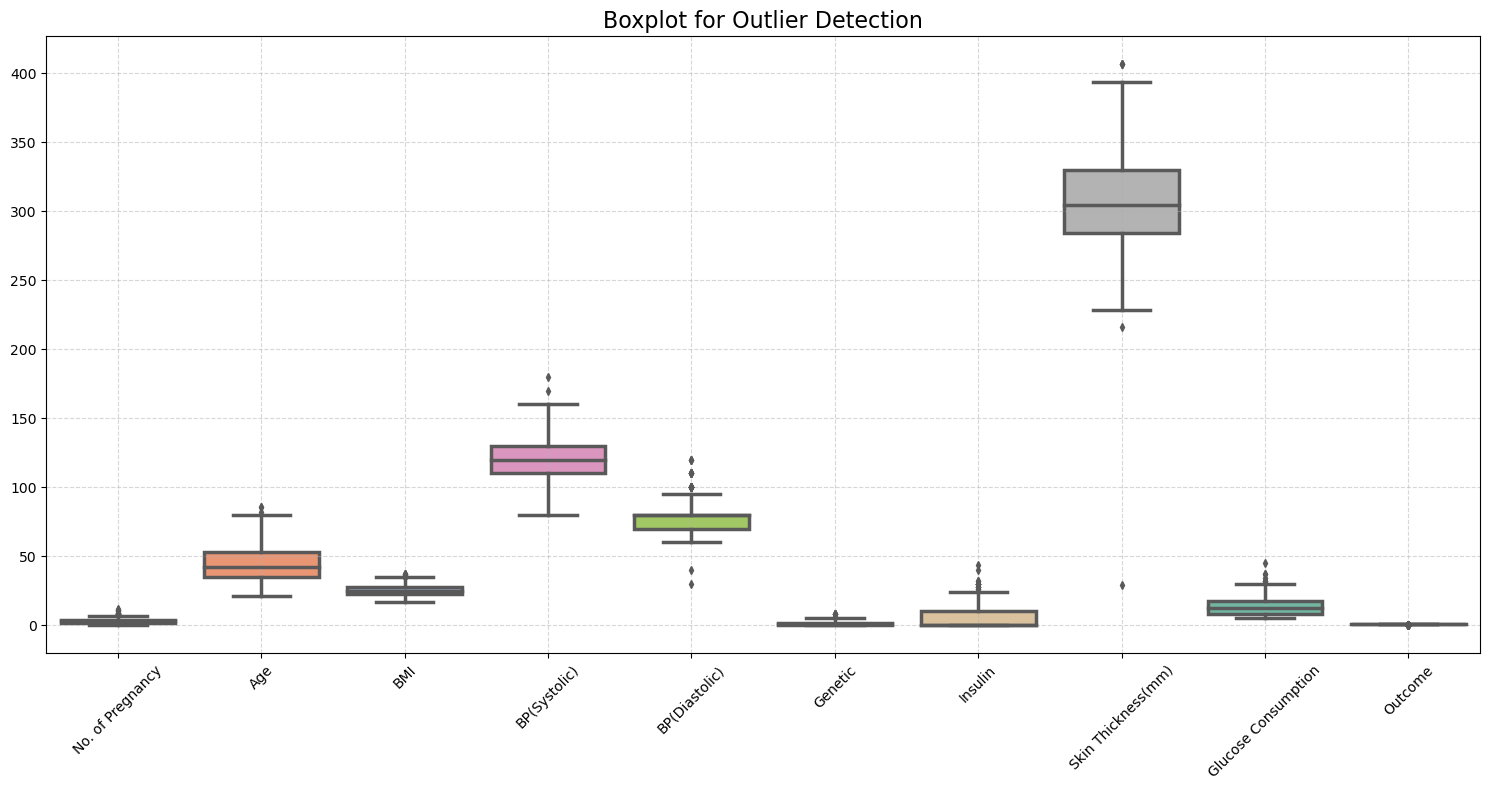

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.boxplot(data=data, palette="Set2", linewidth=2.5, fliersize=4)
plt.title('Boxplot for Outlier Detection', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [7]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)  # First quartile (25th percentile)
    Q3 = data.quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Apply IQR method
outliers_iqr = data.apply(detect_outliers_iqr)

# Count outliers per column
print("Outliers detected per column (IQR method):")
print(outliers_iqr.sum())


Outliers detected per column (IQR method):
No. of Pregnancy       15
Age                     3
BMI                     9
BP(Systolic)            2
BP(Diastolic)          33
Genetic                12
Insulin                18
Skin Thickness(mm)      5
Glucose Consumption     7
Outcome                93
dtype: int64


In [8]:
import numpy as np

# Replace outliers with Mode values
for col in data.columns:
    if col != "Outcome":  # Skip the Outcome column
        mode_value = data[col].mode()
        data[col] = np.where(outliers_iqr[col], mode_value, data[col])

# Confirm that outliers are handled
print("Outliers replaced with mode values (excluding Outcome column).")


Outliers replaced with mode values (excluding Outcome column).


In [9]:
(data == 0).sum()

No. of Pregnancy        20
Age                      0
BMI                      0
BP(Systolic)             0
BP(Diastolic)            0
Genetic                184
Insulin                352
Skin Thickness(mm)       0
Glucose Consumption      0
Outcome                 93
dtype: int64

In [10]:
print(data['Outcome'].value_counts())

Outcome
1    372
0     93
Name: count, dtype: int64


In [11]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler # type: ignore
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}


ML Models with Mode Imputation

In [15]:
from sklearn.metrics import accuracy_score
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{name} Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.94
Decision Tree Accuracy: 0.96
Random Forest Accuracy: 0.99
SVM Accuracy: 0.89
K-Nearest Neighbors Accuracy: 0.84


ML Model's Classfication & Confusion Matrix with Mode impuatation


 Logistic Regression Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.83      0.89      0.86        27
    Diabetes       0.97      0.96      0.96       113

    accuracy                           0.94       140
   macro avg       0.90      0.92      0.91       140
weighted avg       0.94      0.94      0.94       140



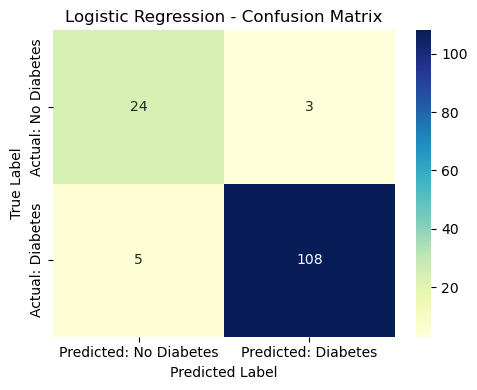


 SVM Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.76      0.59      0.67        27
    Diabetes       0.91      0.96      0.93       113

    accuracy                           0.89       140
   macro avg       0.83      0.77      0.80       140
weighted avg       0.88      0.89      0.88       140



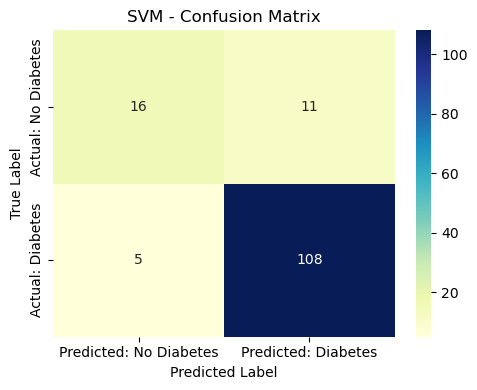


 Random Forest Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.96      0.93      0.94        27
    Diabetes       0.98      0.99      0.99       113

    accuracy                           0.98       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.98      0.98      0.98       140



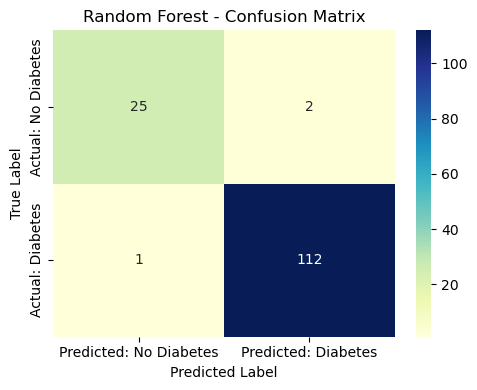

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Models dictionary
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='saga', random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print classification report
    print(f"\n {name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["No Diabetes", "Diabetes"]))
    
    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=["Predicted: No Diabetes", "Predicted: Diabetes"],
                yticklabels=["Actual: No Diabetes", "Actual: Diabetes"])
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()


Proposed Method With Mode Imputation

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(max_iter=500, solver='saga', random_state=42)
svm = SVC(probability=True, random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Train models
log_reg.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Get probability scores for each class (shape: [num_samples, num_classes])
log_prob = log_reg.predict_proba(X_test)
svm_prob = svm.predict_proba(X_test)
rf_prob = rf_model.predict_proba(X_test)

#  Step 1: Multiply probabilities for each class across models
final_prob = log_prob * svm_prob * rf_prob  # Element-wise multiplication

#  Step 2: Select the class with the highest probability
final_prediction = np.argmax(final_prob, axis=1)  # Class with max probability

# Calculate accuracy
final_accuracy = accuracy_score(y_test, final_prediction)

# Print results
print(f"Final Model Accuracy: {final_accuracy:.4f}")


Final Model Accuracy: 0.9714


Confusion matrix for Proposed Method with Mode Imputation

Final Model Accuracy: 0.9714
Precision: 0.9739
Recall: 0.9912
F1 Score: 0.9825


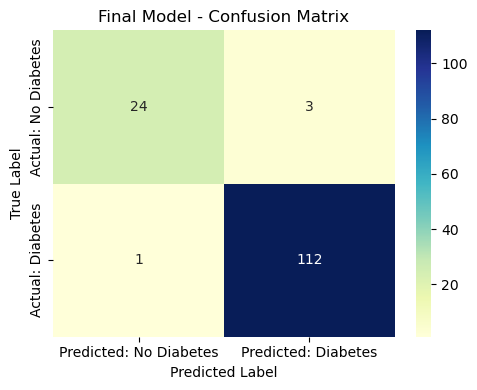

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
accuracy = accuracy_score(y_test, final_prediction)
precision = precision_score(y_test, final_prediction)
recall = recall_score(y_test, final_prediction)
f1 = f1_score(y_test, final_prediction)
cm = confusion_matrix(y_test, final_prediction)

# 🔹 Print metrics
print(f"Final Model Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# 🔹 Confusion Matrix Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=["Predicted: No Diabetes", "Predicted: Diabetes"],
            yticklabels=["Actual: No Diabetes", "Actual: Diabetes"])
plt.title("Final Model - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

5 Fold Cross Validartion for Proposed method with Mode Imputation

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#  Initialize Stratified 5-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#  Initialize lists to store accuracy scores
accuracies = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #  Apply Feature Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define models
    log_reg = LogisticRegression(max_iter=500, solver='saga', random_state=42)
    svm = SVC(probability=True, random_state=42)
    rf_model = RandomForestClassifier(random_state=42)

    # Train models
    log_reg.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    rf_model.fit(X_train, y_train)

    # Get probability scores for each class (shape: [num_samples, num_classes])
    log_prob = log_reg.predict_proba(X_test)
    svm_prob = svm.predict_proba(X_test)
    rf_prob = rf_model.predict_proba(X_test)

    #  Multiply the probabilities for each class across models
    final_prob = log_prob * svm_prob * rf_prob  # Element-wise multiplication

    #  Select the class with the highest probability
    final_prediction = np.argmax(final_prob, axis=1)

    # Calculate accuracy for this fold
    fold_accuracy = accuracy_score(y_test, final_prediction)
    accuracies.append(fold_accuracy)

    print(f"Fold Accuracy: {fold_accuracy:.4f}")

#  Calculate & Print Average Accuracy
final_accuracy = np.mean(accuracies)
print(f"\nFinal 5-Fold Cross-Validation Accuracy: {final_accuracy:.4f}")


Fold Accuracy: 0.9892
Fold Accuracy: 0.9355
Fold Accuracy: 0.9785
Fold Accuracy: 0.9785
Fold Accuracy: 0.9570

Final 5-Fold Cross-Validation Accuracy: 0.9677


Confusion matrix of 5 Fold CV for Proposed method with Mode Imputation


Final 5-Fold Cross-Validation Average Accuracy: 0.9677
Final 5-Fold Cross-Validation Average Precision: 0.9865
Final 5-Fold Cross-Validation Average Recall: 0.9732
Final 5-Fold Cross-Validation Average F1-Score: 0.9796


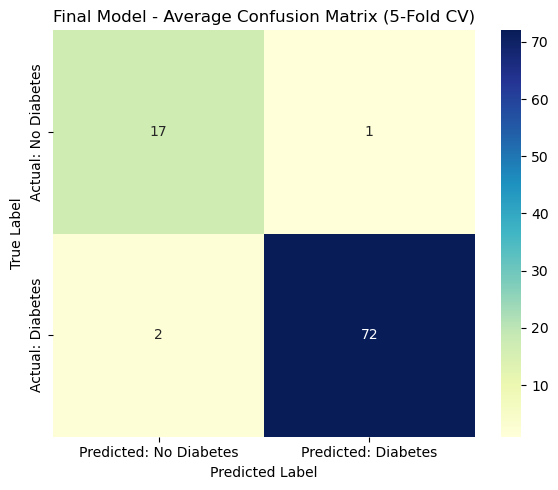

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Initialize Stratified 5-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []
confusion_matrices = []

# Iterate through each fold
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply Feature Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define models
    log_reg = LogisticRegression(max_iter=500, solver='saga', random_state=42)
    svm = SVC(probability=True, random_state=42)
    rf_model = RandomForestClassifier(random_state=42)

    # Train models
    log_reg.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    rf_model.fit(X_train, y_train)

    # Get probability scores for each class (shape: [num_samples, num_classes])
    log_prob = log_reg.predict_proba(X_test)
    svm_prob = svm.predict_proba(X_test)
    rf_prob = rf_model.predict_proba(X_test)

    # Multiply the probabilities for each class across models
    final_prob = log_prob * svm_prob * rf_prob  # Element-wise multiplication

    # Select the class with the highest probability
    final_prediction = np.argmax(final_prob, axis=1)

    # Calculate metrics for this fold
    accuracy = accuracy_score(y_test, final_prediction)
    precision = precision_score(y_test, final_prediction)
    recall = recall_score(y_test, final_prediction)
    f1 = f1_score(y_test, final_prediction)
    cm = confusion_matrix(y_test, final_prediction)

    # Append metrics for this fold
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    confusion_matrices.append(cm)

# Calculate and print average metrics
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1_score = np.mean(f1_scores)

print(f"\nFinal 5-Fold Cross-Validation Average Accuracy: {avg_accuracy:.4f}")
print(f"Final 5-Fold Cross-Validation Average Precision: {avg_precision:.4f}")
print(f"Final 5-Fold Cross-Validation Average Recall: {avg_recall:.4f}")
print(f"Final 5-Fold Cross-Validation Average F1-Score: {avg_f1_score:.4f}")

# Get the final confusion matrix (average across all folds)
final_cm = np.mean(confusion_matrices, axis=0).astype(int)

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(final_cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=["Predicted: No Diabetes", "Predicted: Diabetes"],
            yticklabels=["Actual: No Diabetes", "Actual: Diabetes"])
plt.title("Final Model - Average Confusion Matrix (5-Fold CV)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


Using SMOTE()

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

#  Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

#  Apply SMOTE to the training set only
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#  Apply Feature Scaling (StandardScaler)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

#  Print Class Distribution Before and After SMOTE
print("Class Distribution Before SMOTE:\n", y_train.value_counts())
print("\nClass Distribution After SMOTE:\n", pd.Series(y_train_resampled).value_counts())



Class Distribution Before SMOTE:
 Outcome
1    260
0     65
Name: count, dtype: int64

Class Distribution After SMOTE:
 Outcome
1    260
0    260
Name: count, dtype: int64


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}


ML Model With Mode Imputation After SMOTE() Applied

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test set
    accuracy = accuracy_score(y_test, y_pred)  # Compute accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")  # Print accuracy


Logistic Regression Accuracy: 0.8857
Decision Tree Accuracy: 0.9500
Random Forest Accuracy: 0.9714
SVM Accuracy: 0.8571
K-Nearest Neighbors Accuracy: 0.7357


ML Model's Classification Report & Confusion matrix With Mode Imputation After SMOTE() Applied


 Logistic Regression Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.64      1.00      0.78        28
    Diabetes       1.00      0.86      0.92       112

    accuracy                           0.89       140
   macro avg       0.82      0.93      0.85       140
weighted avg       0.93      0.89      0.89       140



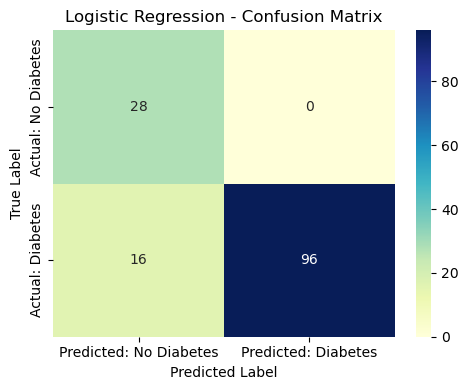


 SVM Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.60      0.89      0.71        28
    Diabetes       0.97      0.85      0.90       112

    accuracy                           0.86       140
   macro avg       0.78      0.87      0.81       140
weighted avg       0.89      0.86      0.87       140



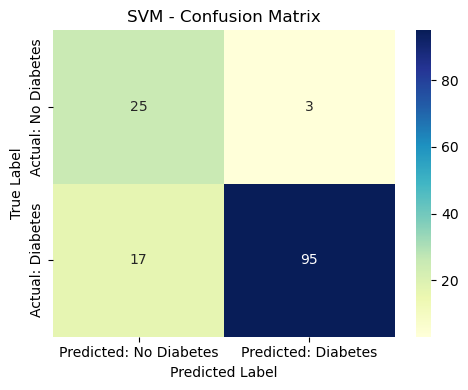


 Random Forest Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.88      1.00      0.93        28
    Diabetes       1.00      0.96      0.98       112

    accuracy                           0.97       140
   macro avg       0.94      0.98      0.96       140
weighted avg       0.97      0.97      0.97       140



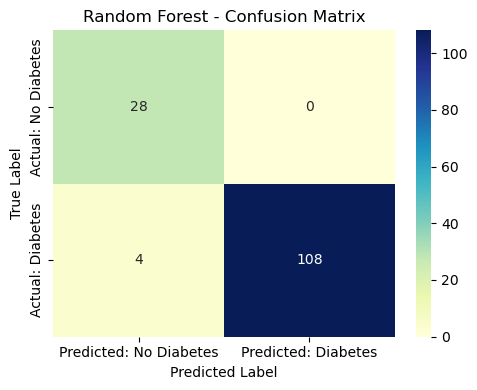

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# Models dictionary
models = {
    'Logistic Regression': LogisticRegression(max_iter=500, solver='saga', random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
}

# Evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train_resampled, y_train_resampled)  # Train the model
    y_pred = model.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print classification report
    print(f"\n {name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["No Diabetes", "Diabetes"]))
    
    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=["Predicted: No Diabetes", "Predicted: Diabetes"],
                yticklabels=["Actual: No Diabetes", "Actual: Diabetes"])
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()


Proposed Method With Mode Imputation After SMOTE() Applied

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#  Step 1: Split dataset into 70% train and 30% test (Stratify ensures balanced class distribution)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

#  Step 2: Apply SMOTE to balance the training dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#  Step 3: Scale features for better model convergence
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

#  Step 4: Initialize ML models
log_reg = LogisticRegression(max_iter=500, solver='saga', random_state=42)
svm = SVC(probability=True, random_state=42)
rf_model = RandomForestClassifier(random_state=42)

#  Step 5: Train models
log_reg.fit(X_train_resampled, y_train_resampled)
svm.fit(X_train_resampled, y_train_resampled)
rf_model.fit(X_train_resampled, y_train_resampled)

#  Step 6: Get probability scores for each class (shape: [num_samples, num_classes])
log_prob = log_reg.predict_proba(X_test)
svm_prob = svm.predict_proba(X_test)
rf_prob = rf_model.predict_proba(X_test)

#  Step 7: Multiply probabilities for each class across models (Element-wise multiplication)
final_prob = log_prob * svm_prob * rf_prob  

#  Step 8: Select the class with the highest probability
final_prediction = np.argmax(final_prob, axis=1)  

#  Step 9: Calculate accuracy
final_accuracy = accuracy_score(y_test, final_prediction)

#  Print results
print(f"Final Model Accuracy (SMOTE Applied): {final_accuracy:.4f}")


Final Model Accuracy (SMOTE Applied): 0.9429


Confusion Matrix of Proposed Method With Mode Imputation After SMOTE() Applied

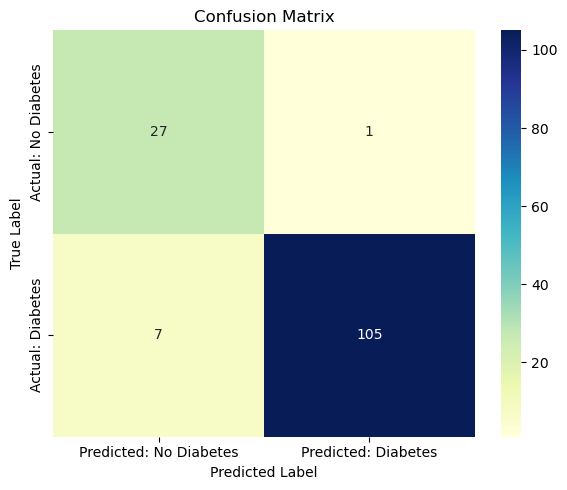

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm_final = confusion_matrix(y_test, final_prediction)

# Plot and save confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Predicted: No Diabetes', 'Predicted: Diabetes'],
            yticklabels=['Actual: No Diabetes', 'Actual: Diabetes'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()

# Save the image
plt.savefig("confusion_matrix.png", dpi=300)  # Saves in current working directory
plt.show()


5 Fold Cross Validation for Proposed Method with Mode Imputation After SMOTE() Applied

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
#  Initialize Stratified 5-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#  Initialize lists to store accuracy scores
accuracies = []

#  Iterate through each fold
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #  Apply Feature Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define models
    log_reg = LogisticRegression(max_iter=500, solver='saga', random_state=42)
    svm = SVC(probability=True, random_state=42)
    rf_model = RandomForestClassifier(random_state=42)

    # Train models
    log_reg.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    rf_model.fit(X_train, y_train)

    # Get probability scores for each class (shape: [num_samples, num_classes])
    log_prob = log_reg.predict_proba(X_test)
    svm_prob = svm.predict_proba(X_test)
    rf_prob = rf_model.predict_proba(X_test)

    #  Multiply the probabilities for each class across models
    final_prob = log_prob * svm_prob * rf_prob  # Element-wise multiplication

    #  Select the class with the highest probability
    final_prediction = np.argmax(final_prob, axis=1)

    # Calculate accuracy for this fold
    fold_accuracy = accuracy_score(y_test, final_prediction)
    accuracies.append(fold_accuracy)

    print(f"Fold Accuracy: {fold_accuracy:.4f}")

#  Calculate & Print Average Accuracy
final_accuracy = np.mean(accuracies)
print(f"\nFinal 5-Fold Cross-Validation Accuracy: {final_accuracy:.4f}")


Fold Accuracy: 0.9892
Fold Accuracy: 0.9355
Fold Accuracy: 0.9785
Fold Accuracy: 0.9785
Fold Accuracy: 0.9570

Final 5-Fold Cross-Validation Accuracy: 0.9677


Confusion Matrix for Proposed Method with Mode Imputation After SMOTE() Applied


Final 5-Fold Cross-Validation Average Accuracy: 0.9677
Final 5-Fold Cross-Validation Average Precision: 0.9865
Final 5-Fold Cross-Validation Average Recall: 0.9732
Final 5-Fold Cross-Validation Average F1-Score: 0.9796


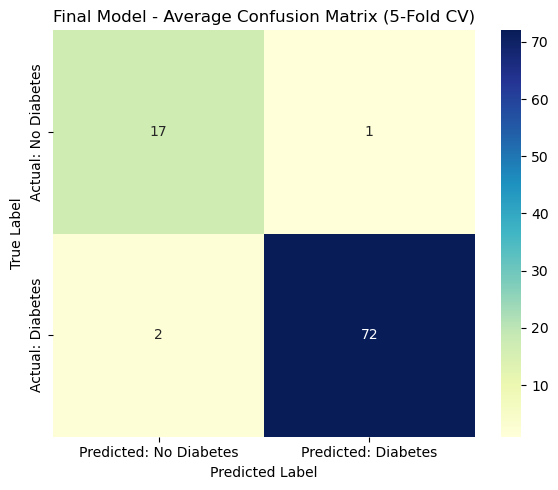

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Stratified 5-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []
confusion_matrices = []

# Iterate through each fold
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply Feature Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define models
    log_reg = LogisticRegression(max_iter=500, solver='saga', random_state=42)
    svm = SVC(probability=True, random_state=42)
    rf_model = RandomForestClassifier(random_state=42)

    # Train models
    log_reg.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    rf_model.fit(X_train, y_train)

    # Get probability scores for each class (shape: [num_samples, num_classes])
    log_prob = log_reg.predict_proba(X_test)
    svm_prob = svm.predict_proba(X_test)
    rf_prob = rf_model.predict_proba(X_test)

    # Multiply the probabilities for each class across models
    final_prob = log_prob * svm_prob * rf_prob  # Element-wise multiplication

    # Select the class with the highest probability
    final_prediction = np.argmax(final_prob, axis=1)

    # Calculate metrics for this fold
    accuracy = accuracy_score(y_test, final_prediction)
    precision = precision_score(y_test, final_prediction)
    recall = recall_score(y_test, final_prediction)
    f1 = f1_score(y_test, final_prediction)
    cm = confusion_matrix(y_test, final_prediction)

    # Append metrics for this fold
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    confusion_matrices.append(cm)
    
# Calculate and print average metrics
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1_score = np.mean(f1_scores)

print(f"\nFinal 5-Fold Cross-Validation Average Accuracy: {avg_accuracy:.4f}")
print(f"Final 5-Fold Cross-Validation Average Precision: {avg_precision:.4f}")
print(f"Final 5-Fold Cross-Validation Average Recall: {avg_recall:.4f}")
print(f"Final 5-Fold Cross-Validation Average F1-Score: {avg_f1_score:.4f}")

# Get the final confusion matrix (average across all folds)
final_cm = np.mean(confusion_matrices, axis=0).astype(int)

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(final_cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=["Predicted: No Diabetes", "Predicted: Diabetes"],
            yticklabels=["Actual: No Diabetes", "Actual: Diabetes"])
plt.title("Final Model - Average Confusion Matrix (5-Fold CV)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()
